In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Amin\\Documents\\manutd(2012-2021)\\utdpass(17-18).csv')

In [3]:
df.head()

,Squad,90s,TotalCmp,TotalPassAtt,TotCmp%,TotDist,PrgDist,ShortCmp,ShortAtm,ShortCmp%,...,LongAtt,LongCmp%,Ast,xA,A-xA,Pass2Shots,1/3,PPA,CrsPA,Prog
0,Arsenal,38,20841,24883,83.8,395187,124268,8620,9665,89.2,...,4171,66.6,61,51.3,7.7,433,1629,506,62,1887
1,Bournemouth,38,13512,17678,76.4,263586,93888,5591,6479,86.3,...,3640,54.2,36,32.2,3.8,350,965,302,75,1232
2,Brighton,38,11951,16139,74.1,254205,92911,4547,5388,84.4,...,4203,55.7,25,23.0,2.0,278,852,196,69,984
3,Burnley,38,10494,14958,70.2,228177,92905,3995,4784,83.5,...,4218,47.9,26,23.8,2.2,281,893,231,88,954
4,Chelsea,38,18952,22867,82.9,370412,117253,7454,8393,88.8,...,4113,65.9,42,42.2,0.8,472,1419,417,79,1672


In [4]:
#FINDING MAX AND MIN Assists
max_A=df['Ast'].max()
min_A=df['Ast'].min()

In [5]:
#FINDING MAX AND MIN xA
max_xA=df['xA'].max()
min_xA=df['xA'].min()

In [6]:
#FINDING MAX AND MIN A-xA
max_AmxA=df['A-xA'].max()
min_AmxA=df['A-xA'].min()

In [7]:
#FINDING Pass2Shots
max_P2S=df['Pass2Shots'].max()
min_P2S=df['Pass2Shots'].min()

In [8]:
#FINDING 1/3 passes
max_1x3=df['1/3'].max()
min_1x3=df['1/3'].min()

In [9]:
#FINDING pass into 18 yard box
max_PPA=df['PPA'].max()
min_PPA=df['PPA'].min()

In [10]:
#FINDING cross into 18 yard box
max_CrsPA=df['CrsPA'].max()
min_CrsPA=df['CrsPA'].min()
print(min_CrsPA)

55


In [11]:
#FINDING cross into Progressive Passes
max_Prog=df['Prog'].max()
min_Prog=df['Prog'].min()

In [12]:
df = df[df['Squad']=='Manchester Utd'].reset_index()

In [13]:
df

,index,Squad,90s,TotalCmp,TotalPassAtt,TotCmp%,TotDist,PrgDist,ShortCmp,ShortAtm,...,LongAtt,LongCmp%,Ast,xA,A-xA,Pass2Shots,1/3,PPA,CrsPA,Prog
0,11,Manchester Utd,38,17775,21650,82.1,329922,107293,8100,8949,...,3993,60.4,53,43.8,9.2,369,1234,369,86,1409


In [14]:
df = df.drop(['index','90s','TotalCmp','TotalPassAtt','TotCmp%','TotDist','PrgDist','ShortCmp','ShortAtm','ShortCmp%','MediumCmp','MediumAtm','MediumCmp%','LongCmp','LongAtt','LongCmp%'],axis=1)

In [15]:
df

,Squad,Ast,xA,A-xA,Pass2Shots,1/3,PPA,CrsPA,Prog
0,Manchester Utd,53,43.8,9.2,369,1234,369,86,1409


In [16]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Ast', 'xA', 'A-xA', 'Pass2Shots', '1/3', 'PPA', 'CrsPA', 'Prog']

In [17]:
#Append values for min range
min_range= []
max_range= []

min_range.append(min_A)
min_range.append(min_xA)
min_range.append(min_AmxA)
min_range.append(min_P2S)
min_range.append(min_1x3)
min_range.append(min_PPA)
min_range.append(min_CrsPA)
min_range.append(min_Prog)

In [18]:
min_range

[19, 18.4, -8.7, 212, 852, 181, 55, 942]

In [19]:
#Append values for max range
max_range.append(max_A)
max_range.append(max_xA)
max_range.append(max_AmxA)
max_range.append(max_P2S)
max_range.append(max_1x3)
max_range.append(max_PPA)
max_range.append(max_CrsPA)
max_range.append(max_Prog)

In [20]:
max_range

[85, 63.3, 20.7, 494, 1992, 537, 107, 2011]

In [21]:
for x in range(len(df['Squad'])):
    if df['Squad'][x] == 'Manchester Utd':
        values = df.iloc[x].values.tolist()
        
values = values[1:]

In [22]:
values

[53, 43.8, 9.2, 369, 1234, 369, 86, 1409]

In [23]:
radar = Radar(params, min_range, max_range,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*8,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [24]:
#We will use mplsoccer’s FontManager to load some fonts from Google Fonts. 
#We borrowed the FontManager from the ridge_map library.

URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

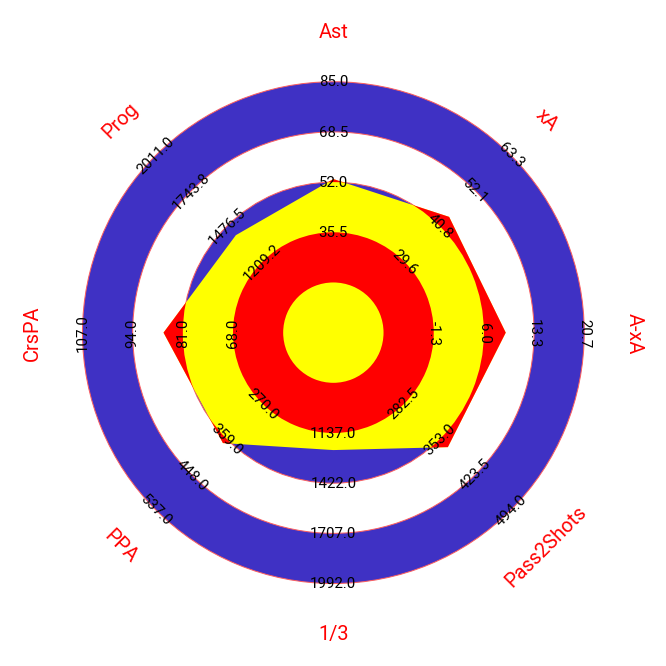

In [25]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#3F31C4', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(values, ax=ax,
                                kwargs_radar={'facecolor': '#ffff00'},
                                kwargs_rings={'facecolor': '#ff0000'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=20,
                                       fontproperties=robotto_regular.prop,color='#ff0000')  # draw the param labels